# Image classification with Convolutional Neural Networks with code and libraries from fastai lesson 1
I going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

# auk vs boat
testing the resnet34 model on auk and boat recogintion. This dataset is relatively small.

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/test-data/"

In [5]:
sz=224

In [6]:
!ls {PATH}valid

auk  boat


In [7]:
files = !ls {PATH}valid/boat
files

['boat.10.jpg',
 'boat.15.jpg',
 'boat.20.jpg',
 'boat.21.jpg',
 'boat.22.jpg',
 'boat.23.jpg',
 'boat.6.jpg']

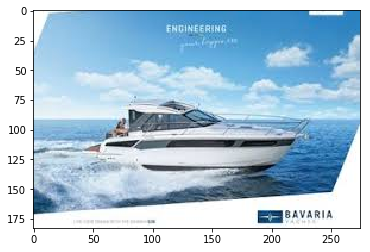

In [8]:
img = plt.imread(f'{PATH}/valid/boat/{files[0]}')
plt.imshow(img)

In [9]:
img.shape

(183, 275, 3)

In [10]:
img[:4, :4] #RGB as the 3 columns

array([[[248, 255, 255],
        [249, 255, 255],
        [251, 255, 255],
        [254, 255, 255]],

       [[249, 255, 255],
        [249, 255, 255],
        [252, 255, 255],
        [254, 255, 255]],

       [[251, 255, 255],
        [252, 255, 255],
        [254, 255, 255],
        [255, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [255, 255, 255],
        [255, 254, 255]]], dtype=uint8)

remove any tmp files before running the model, could be helpful

## plot all .jpgs to visualise that the data downloaded shows birds NOT flying (too complicated for a small number of training and validation models)

In [11]:
def rek_multiple_plots(file_list, file_path):
    fig=plt.figure(figsize=(16, 16))
    for i in range(1, len(file_list)):
        img = plt.imread(os.path.join(file_path, file_list[i]))
        fig.add_subplot(5, 5, i)
        plt.imshow(img)
        plt.title(file_list[i])
    plt.show()

In [12]:
files_boat_train = ! ls {PATH}train/boat
files_boat_valid = ! ls {PATH}valid/boat
files_auk_train = ! ls {PATH}train/auk
files_auk_valid = ! ls {PATH}valid/auk

In [13]:
file_path_train = os.path.join('data', 'test-data', 'train', 'boat')
file_path_valid = os.path.join('data', 'test-data', 'valid', 'boat')
file_path_auk_train = os.path.join('data', 'test-data', 'train', 'auk')
file_path_auk_valid = os.path.join('data', 'test-data', 'valid', 'auk')

In [14]:
#rek_multiple_plots(files_auk_valid, file_path_auk_valid)

In [15]:
#rek_multiple_plots(files_auk_train, file_path_auk_train)

In [16]:
#rek_multiple_plots(files_boat_valid, file_path_valid)

In [17]:
#rek_multiple_plots(files_gull_train, file_path_train)

In [18]:
!rm -rf {PATH}tmp

Now use the pre-trained resnet34 model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. 

problems encounted with .ipynb_checkpoints in data folder. Similar issues from fastai forum: https://forums.fast.ai/t/attributeerror-nonetype-object-has-no-attribute-shape/9105/21

solution: remove all .ipynb_checkpoints.

In [19]:
!rm -r {PATH}.ipynb_checkpoints
!rm -r {PATH}valid/.ipynb_checkpoints
!rm -r {PATH}train/.ipynb_checkpoints
!rm -r {PATH}train/auk/.ipynb_checkpoints
!rm -r {PATH}train/boat/.ipynb_checkpoints
!rm -r {PATH}valid/auk/.ipynb_checkpoints
!rm -r {PATH}valid/boat/.ipynb_checkpoints

rm: cannot remove 'data/test-data/.ipynb_checkpoints': No such file or directory
rm: cannot remove 'data/test-data/valid/.ipynb_checkpoints': No such file or directory
rm: cannot remove 'data/test-data/train/.ipynb_checkpoints': No such file or directory
rm: cannot remove 'data/test-data/train/auk/.ipynb_checkpoints': No such file or directory
rm: cannot remove 'data/test-data/train/boat/.ipynb_checkpoints': No such file or directory
rm: cannot remove 'data/test-data/valid/auk/.ipynb_checkpoints': No such file or directory
rm: cannot remove 'data/test-data/valid/boat/.ipynb_checkpoints': No such file or directory


In [20]:
! ls -a {PATH}

.  ..  difficult_imgs  models  train  valid


the fastai library is being continually updated when new papers come out so should contain best practice. The fastai library sits on top of PyTorch, written by facebook. Most of the top researchers are using PyTorch. Tensorflow is good, but better known because it is marketed so heavily. 

In [22]:
arch=resnet34 #Constructs a ResNet-34 model.
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       0.84635  0.5362   0.625  ]                    
[ 1.       0.77284  0.28587  0.9375 ]            



The 3rd number is accuracy of the model, the other two will be explained later in the course

In [24]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [25]:
data.classes
# 0 is auk and 1 is boat

['auk', 'boat']

getting the predictions

In [26]:
log_preds = learn.predict()
log_preds.shape

(16, 2)

In [27]:
log_preds[:10]

array([[-0.07244, -2.66101],
       [-0.04111, -3.21204],
       [-0.02873, -3.56432],
       [-0.04693, -3.08245],
       [-0.02498, -3.702  ],
       [-0.04099, -3.21478],
       [-0.21437, -1.64534],
       [-0.02088, -3.8796 ],
       [-0.08089, -2.55483],
       [-0.50381, -0.92691]], dtype=float32)

getting the probabilities

In [28]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])

In [29]:
def rand_by_mask(mask):
    mask_idxs = np.where(mask)[0]
    cnt = min(4, len(mask_idxs))
    return np.random.choice(mask_idxs, cnt, replace=False)

def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Correctly classified


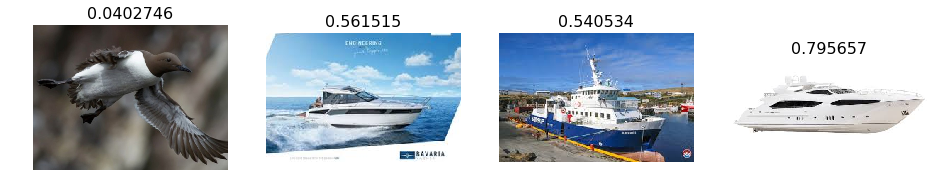

In [30]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


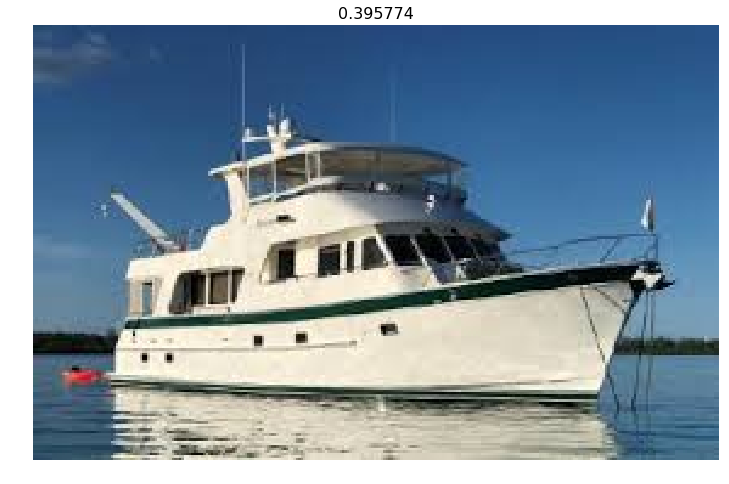

In [31]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

Most correct auks


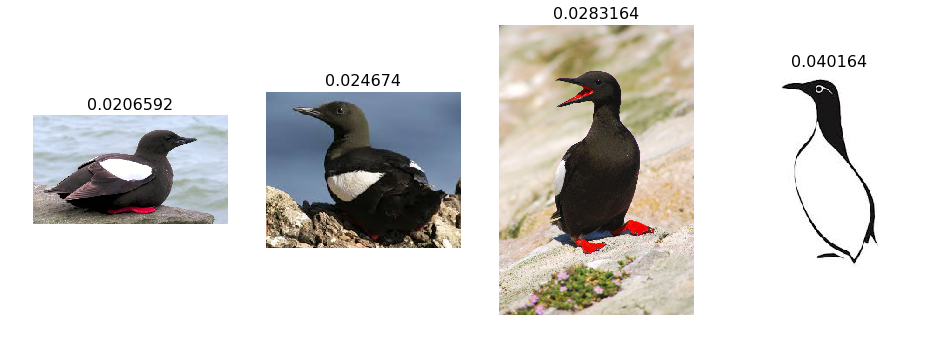

In [32]:
plot_val_with_title(most_by_correct(0, True), "Most correct auks")

Most correct boats


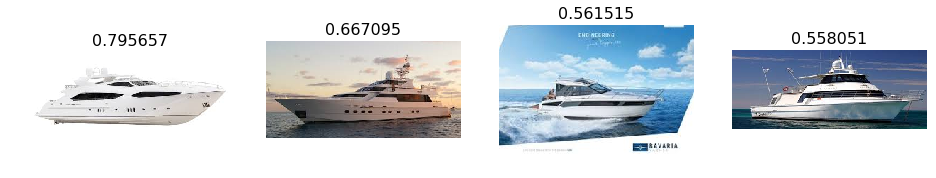

In [33]:
plot_val_with_title(most_by_correct(1, True), "Most correct boats")

In [37]:
#plot_val_with_title(most_by_correct(0, False), "Most incorrect auks")

Most incorrect boats


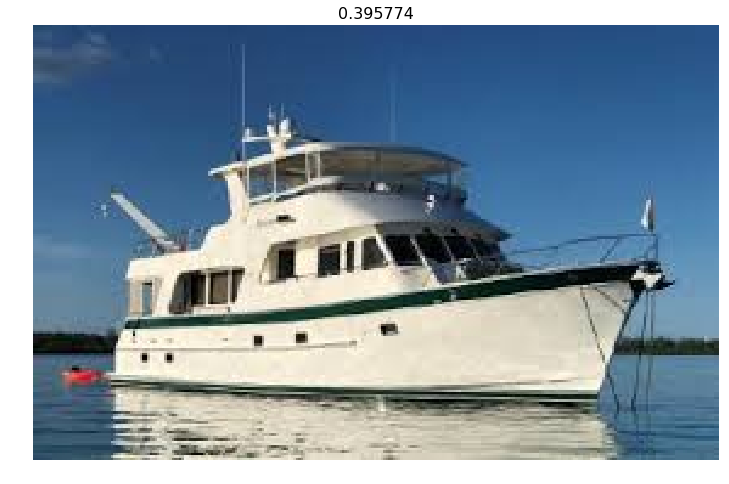

In [35]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect boats")

Most uncertain predictions


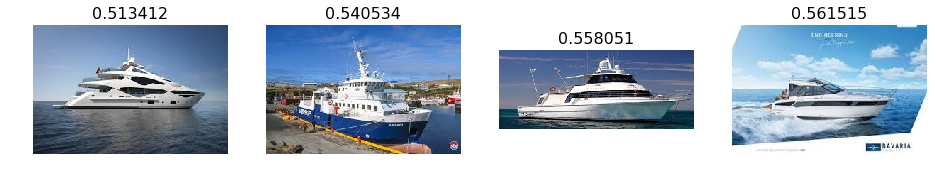

In [36]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

learning rate

In [ ]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [ ]:
lrf=learn.lr_find()

In [ ]:
learn.sched.plot_lr()

In [ ]:
learn.sched.plot_lr()